In [ ]:
#Setup

In [3]:
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [5]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [9]:
y.shape

(70000,)

In [11]:
28 * 28

784

Saving figure some_digit_plot


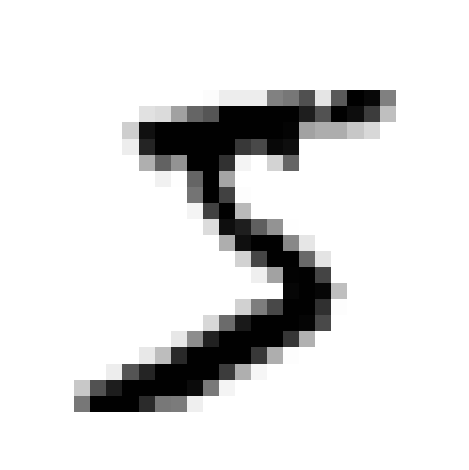

In [13]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [15]:
y[0]

'5'

In [17]:
y = y.astype(np.uint8)

In [19]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [21]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Saving figure more_digits_plot


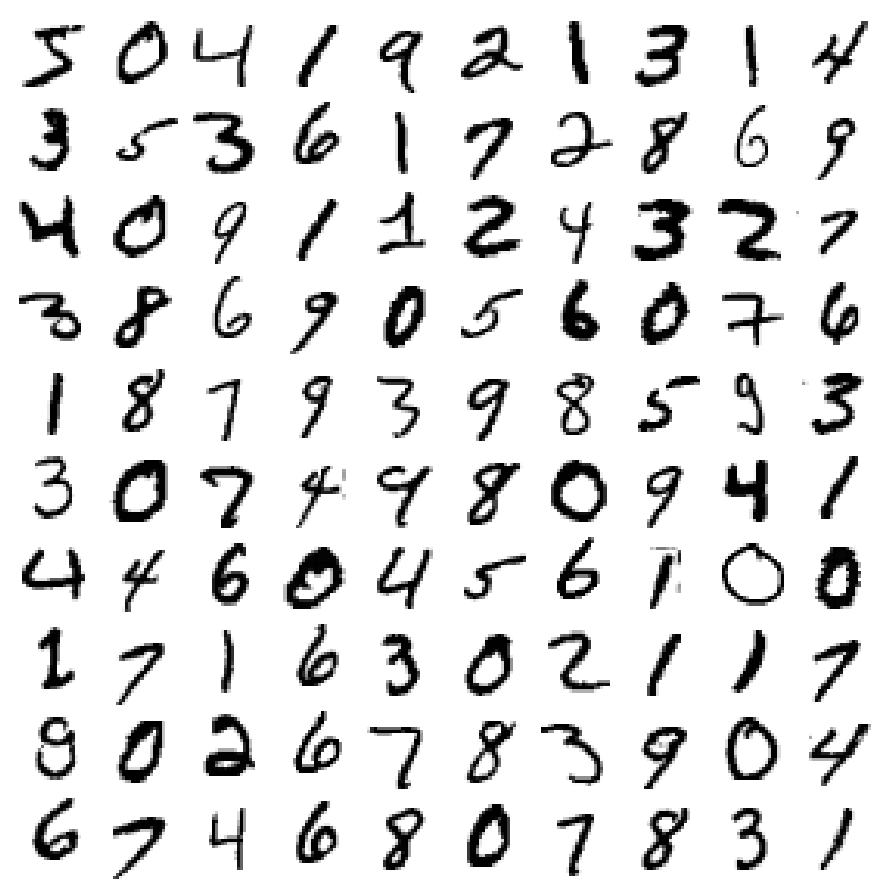

In [23]:
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [25]:
y[0]

5

In [27]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [29]:
# Training a Binary Classifier

In [31]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [33]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [34]:
sgd_clf.predict([some_digit])

array([ True])

In [37]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [39]:
#KNN classifier

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [43]:
y_knn_pred = knn_clf.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

0.9714

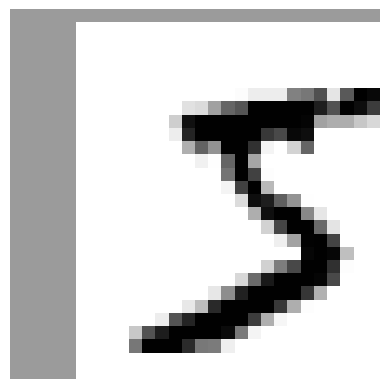

In [47]:
from scipy.ndimage import shift
def shift_digit(digit_array, dx, dy, new=0):
    return shift(digit_array.reshape(28, 28), [dy, dx], cval=new).reshape(784)

plot_digit(shift_digit(some_digit, 5, 1, new=100))

In [49]:
X_train_expanded = [X_train]
y_train_expanded = [y_train]
for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    shifted_images = np.apply_along_axis(shift_digit, axis=1, arr=X_train, dx=dx, dy=dy)
    X_train_expanded.append(shifted_images)
    y_train_expanded.append(y_train)

X_train_expanded = np.concatenate(X_train_expanded)
y_train_expanded = np.concatenate(y_train_expanded)
X_train_expanded.shape, y_train_expanded.shape

((300000, 784), (300000,))

In [51]:
knn_clf.fit(X_train_expanded, y_train_expanded)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [53]:
y_knn_expanded_pred = knn_clf.predict(X_test)

In [55]:
accuracy_score(y_test, y_knn_expanded_pred)

0.9763

In [57]:
ambiguous_digit = X_test[2589]
knn_clf.predict_proba([ambiguous_digit])

array([[0.24579675, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.75420325]])

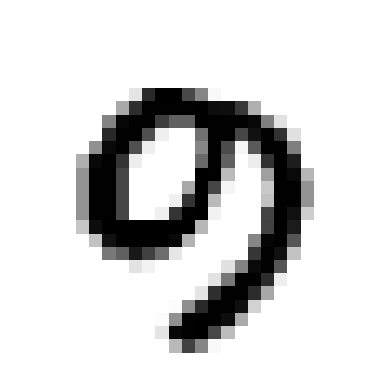

In [59]:
plot_digit(ambiguous_digit)

In [66]:
#grid search with cross validations for knn With Over 97% Accuracy

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import numpy as np

# Reduce dimensions using PCA to avoid memory issues
pca = PCA(n_components=50)  
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

# Define the KNN classifier
knn_clf = KNeighborsClassifier()

# Define the parameter grid to search for the best hyperparameters
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  
    'weights': ['uniform', 'distance']  
}


grid_search = GridSearchCV(knn_clf, param_grid, cv=5, scoring='accuracy', verbose=3, n_jobs=-1)  # n_jobs=-1 uses all processors


grid_search.fit(X_train_reduced, y_train)


print("Best parameters found by Grid Search:", grid_search.best_params_)


best_knn_clf = grid_search.best_estimator_
best_knn_clf.fit(X_train_reduced, y_train)


y_knn_pred = best_knn_clf.predict(X_test_reduced)
accuracy = accuracy_score(y_test, y_knn_pred)
print("Test set accuracy with best hyperparameters:", accuracy)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found by Grid Search: {'n_neighbors': 5, 'weights': 'distance'}
Test set accuracy with best hyperparameters: 0.9761


In [ ]:
#Confusion matrix for knn classifier

Confusion Matrix:
[[1335    0    5    0    0    0    1    1    1    0]
 [   0 1591    3    0    1    1    0    3    0    1]
 [   8   14 1333    1    1    1    4   13    3    2]
 [   0    3   12 1382    0   10    2   10    7    7]
 [   3    9    1    0 1248    0    2    4    1   27]
 [   4    5    0   13    4 1234   12    0    1    0]
 [   5    1    0    0    4    3 1383    0    0    0]
 [   1   17    4    0    2    0    0 1467    1   11]
 [   6   13    8   21    4   16    3    6 1269   11]
 [   6    6    3   14   20    0    0   14    1 1356]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1343
           1       0.96      0.99      0.98      1600
           2       0.97      0.97      0.97      1380
           3       0.97      0.96      0.97      1433
           4       0.97      0.96      0.97      1295
           5       0.98      0.97      0.97      1273
           6       0.98      0.99      0.99     

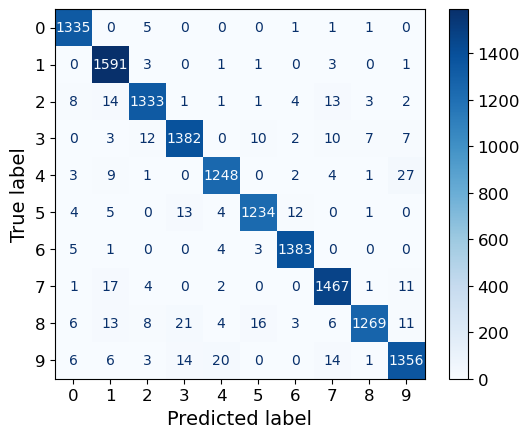

In [71]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the MNIST dataset (or any dataset you are using)
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix using a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()

In [ ]:
#learning curves for knn classifier

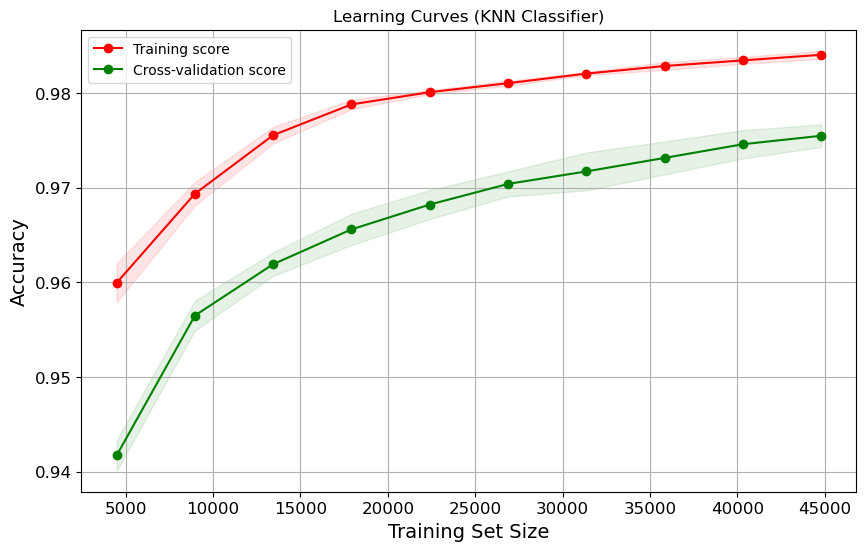

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

# Optional: Reduce dimensions using PCA for faster computation (adjust components as needed)
pca = PCA(n_components=50)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

# Define the KNN classifier
knn_clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')  # Use the optimal parameters found from Grid Search

# Function to plot learning curves
def plot_learning_curves(estimator, X, y, cv=5, scoring='accuracy', n_jobs=-1):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, scoring=scoring, train_sizes=np.linspace(0.1, 1.0, 10)
    )
    
    # Calculate mean and standard deviation for train and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.title("Learning Curves (KNN Classifier)")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.grid()

    # Plot training scores
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")

    # Plot cross-validation scores
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

# Plot the learning curves for the KNN classifier
plot_learning_curves(knn_clf, X_train_reduced, y_train)


In [ ]:
#accuracy for SGD classifier

In [61]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Pipeline that standardizes the data and applies SGDClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the features
    ('sgd', SGDClassifier(random_state=42, early_stopping=True))  # SGD Classifier
])

# Hyperparameter grid for GridSearchCV
param_grid = {
    'sgd__loss': ['hinge', 'log_loss'],  # Hinge for linear SVM, log_loss for logistic regression
    'sgd__alpha': [0.0001, 0.001],  # Regularization strength
    'sgd__learning_rate': ['optimal', 'constant'],  # Learning rate schedule
    'sgd__eta0': [0.01, 0.1],  # Initial learning rate
    'sgd__penalty': ['elasticnet'],  # Type of regularization
    'sgd__max_iter': [1000]  # Number of iterations
}

# Set up the GridSearchCV with 5-fold cross-validation
grid_search_sgd = GridSearchCV(
    pipeline, param_grid, 
    cv=5, scoring='accuracy', verbose=1, n_jobs=-1  # Use all cores for faster search
)

# Fit the grid search on training data
grid_search_sgd.fit(X_train, y_train)

# Print the best parameters found by grid search
print("Best parameters found by Grid Search:", grid_search_sgd.best_params_)

# Use the best estimator to predict on the test set
best_sgd_clf = grid_search_sgd.best_estimator_
y_sgd_pred = best_sgd_clf.predict(X_test)

# Evaluate the accuracy on the test set
accuracy = accuracy_score(y_test, y_sgd_pred)
print("Test set accuracy with best hyperparameters:", accuracy)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found by Grid Search: {'sgd__alpha': 0.0001, 'sgd__eta0': 0.01, 'sgd__learning_rate': 'optimal', 'sgd__loss': 'hinge', 'sgd__max_iter': 1000, 'sgd__penalty': 'elasticnet'}
Test set accuracy with best hyperparameters: 0.9145


In [ ]:
#confusion matrix for sgdclassifier

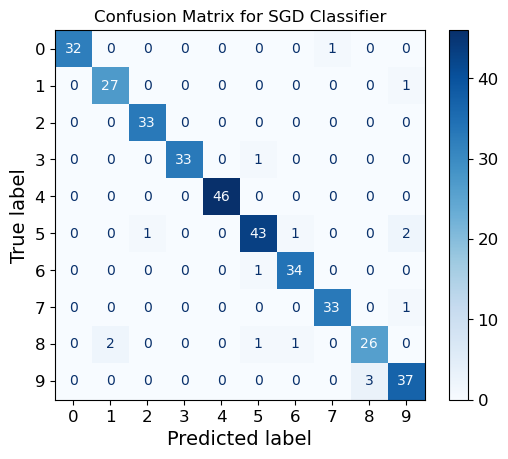

In [49]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the MNIST dataset (or any dataset you are using)
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the SGD classifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = sgd_clf.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix using a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=sgd_clf.classes_)
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()

In [ ]:
#learning curves for sgd regressor

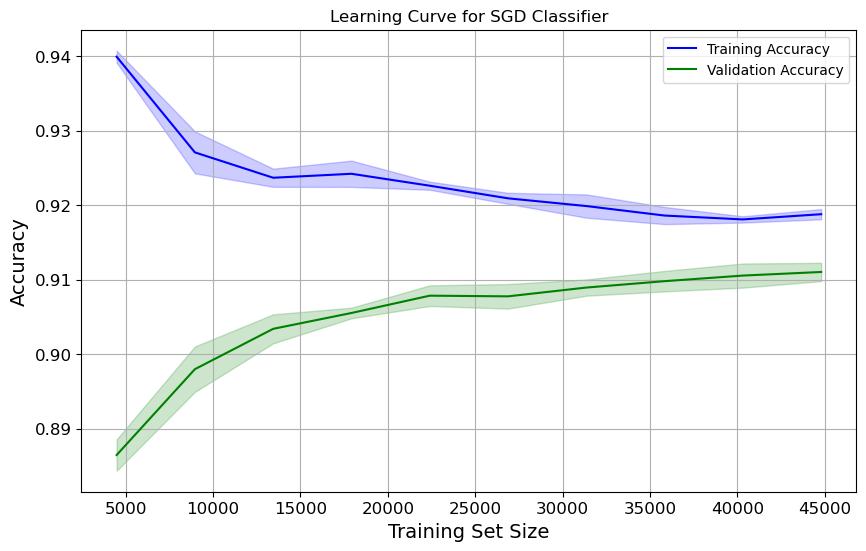

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    grid_search_sgd.best_estimator_,  # Best estimator from GridSearchCV
    X_train, y_train,  # Training data
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Metric used to evaluate performance
    n_jobs=-1,  # Use all available cores
    train_sizes=np.linspace(0.1, 1.0, 10),  # Train on 10% to 100% of the data
    random_state=42
)

# Calculate the mean and standard deviation for the training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, val_mean, label='Validation Accuracy', color='green')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='green', alpha=0.2)

# Labels and title
plt.title('Learning Curve for SGD Classifier')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
#fine-tuning for random-forest classifier

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [None, 10, 20], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2],  
    'bootstrap': [True, False]
}

# Set up GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', verbose=1, n_jobs=4)

# Fit the model
grid_search_rf.fit(X_train, y_train)

# If you also want to print the best parameters and accuracy on the test set:
print("Best parameters:", grid_search_rf.best_params_)
y_pred = grid_search_rf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Test Accuracy: 0.9722857142857143


In [ ]:
#Confusion matrix for RandomForestClassifier

Accuracy of the Random Forest Classifier: 97.22%


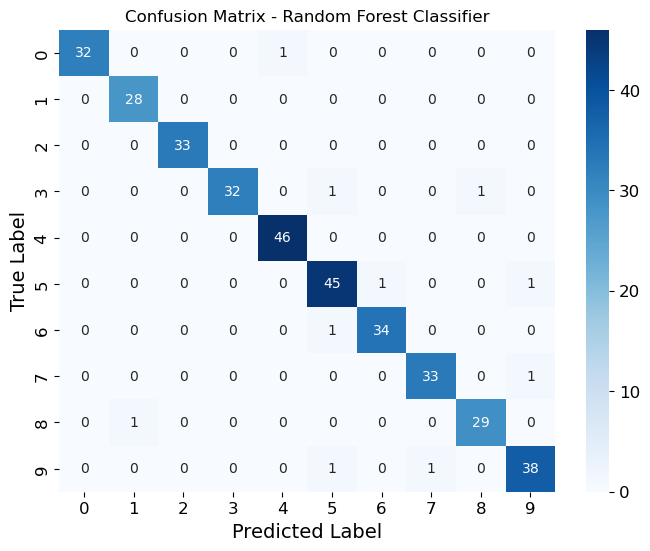

In [51]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the MNIST dataset (or any dataset you are using)
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_clf.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix using a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rf_clf.classes_)
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()

In [53]:
#learning curves for random forest regressor

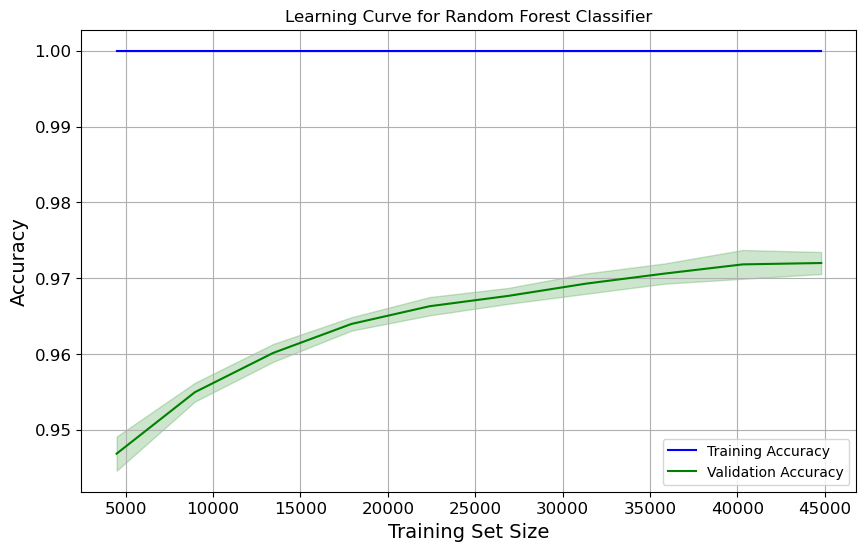

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier

# Assuming grid_search_rf is the GridSearchCV object for Random Forest
# Best estimator from GridSearchCV
best_rf_clf = RandomForestClassifier(
    bootstrap=False, 
    max_depth=None, 
    min_samples_leaf=1, 
    min_samples_split=2, 
    n_estimators=200,
    random_state=42
)

# Generate learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    best_rf_clf,  # Best estimator from GridSearchCV
    X_train, y_train,  # Training data
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Metric used to evaluate performance
    n_jobs=-1,  # Use all available cores
    train_sizes=np.linspace(0.1, 1.0, 10),  # Train on 10% to 100% of the data
    random_state=42
)

# Calculate the mean and standard deviation for the training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, val_mean, label='Validation Accuracy', color='green')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='green', alpha=0.2)

# Labels and title
plt.title('Learning Curve for Random Forest Classifier')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
#Comparing the acuracy of classifiers

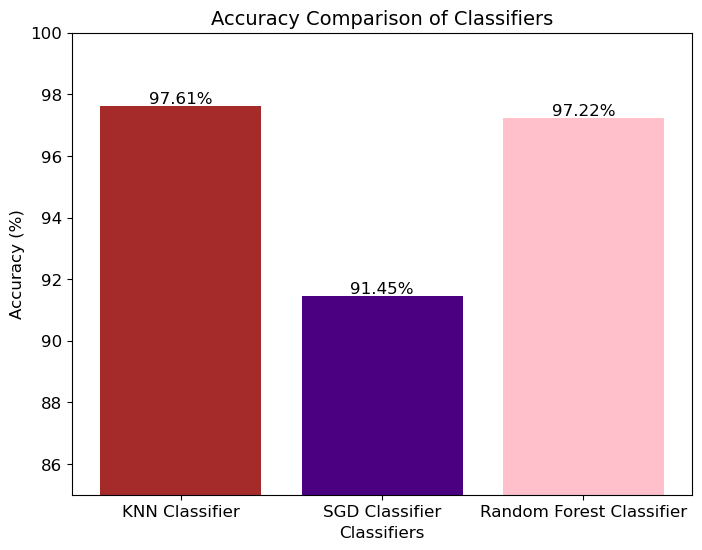

In [100]:
# Import necessary libraries
import matplotlib.pyplot as plt


classifiers = ['KNN Classifier', 'SGD Classifier', 'Random Forest Classifier']
accuracies = [97.61, 91.45, 97.22]  # Accuracies in percentage

plt.figure(figsize=(8, 6))
plt.bar(classifiers, accuracies, color=['brown', 'indigo', 'pink'])


plt.title('Accuracy Comparison of Classifiers', fontsize=14)
plt.xlabel('Classifiers', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)

for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.1, f'{accuracy:.2f}%', ha='center', fontsize=12)

plt.ylim(85, 100)  
plt.show()